# Analysis on Kickstarter

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [5]:
# Load the data
df = pd.read_json('../data/creator_first_project.json', lines = True)
df.shape

(328653, 135)

# Visualize the Data

Text(0.5, 1.0, 'New Kickstarter Creators by Year')

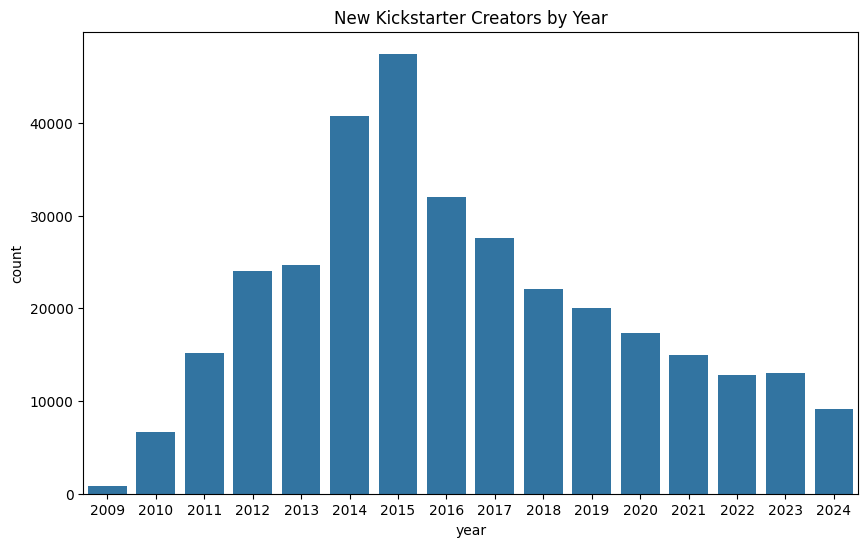

In [7]:
# New Kickstarter Creators by Year
df['year'] = df['launched_at'].dt.year
df['month'] = df['launched_at'].dt.month

# Plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='year')
plt.title('New Kickstarter Creators by Year')

Plot the discontinuity

In [8]:
# Create Discontinuity Columns
df['percent_to_goal'] = df['pledged'] / df['goal']
df['dollars_to_goal'] = df['goal'] - df['pledged']

In [12]:
# Filter out people too high or too low
modified_df = df.copy()
modified_df = modified_df[(modified_df['percent_to_goal'] <= 2) & (modified_df['percent_to_goal'] > -2)]
# Keep binned data
modified_df['percent_to_goal_binned'] = pd.cut(modified_df['percent_to_goal'], bins=20)
binned_data = modified_df.groupby('percent_to_goal_binned').agg({'total_successful_after_first': 'mean', 'total_failed_after_first': 'mean'}).reset_index()
binned_data['percent_to_goal'] = binned_data['percent_to_goal_binned'].apply(lambda interval: interval.mid)  # Get the midpoint of each bin



/var/folders/5z/9swl8k014xv3sfx5vks7xw_h0000gn/T/ipykernel_3310/504103981.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = modified_df.groupby('percent_to_goal_binned').agg({'total_successful_after_first': 'mean', 'total_failed_after_first': 'mean'}).reset_index()


Average Successfull Campaigns After First

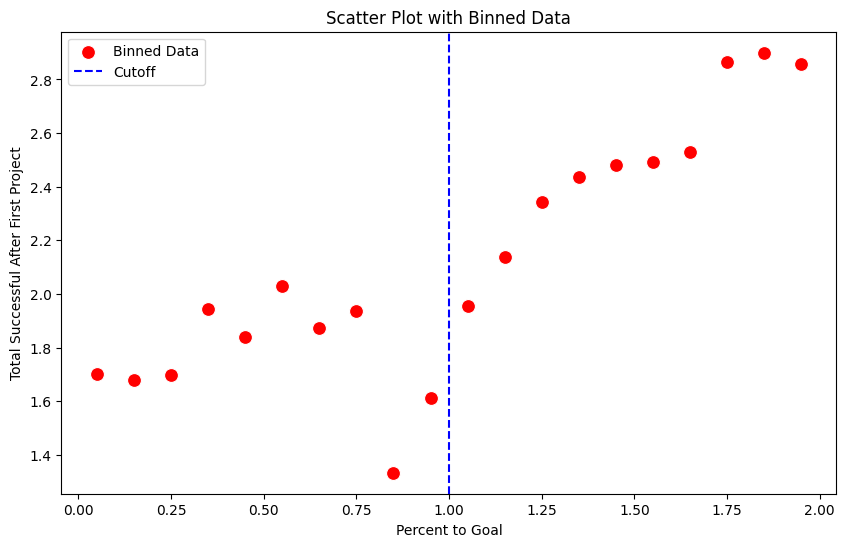

In [13]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=binned_data, x='percent_to_goal', y='total_successful_after_first', color='red', label='Binned Data', s=100)

plt.xlabel('Percent to Goal')
plt.ylabel('Total Successful After First Project')
plt.axvline(x=1, color='blue', linestyle='--', label='Cutoff')
plt.legend()
plt.title('Scatter Plot with Binned Data')
plt.show()

Average Failed Campaigns After First

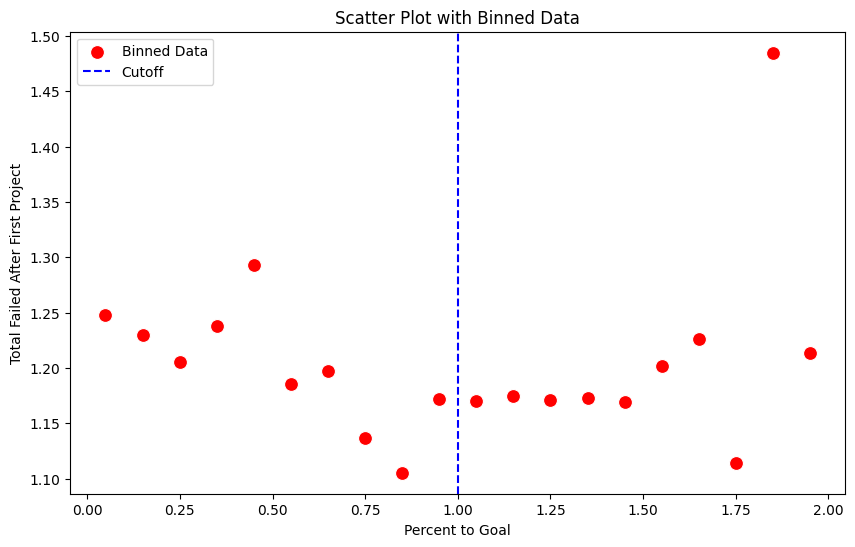

In [14]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=binned_data, x='percent_to_goal', y='total_failed_after_first', color='red', label='Binned Data', s=100)

plt.xlabel('Percent to Goal')
plt.ylabel('Total Failed After First Project')
plt.axvline(x=1, color='blue', linestyle='--', label='Cutoff')
plt.legend()
plt.title('Scatter Plot with Binned Data')
plt.show()